In [8]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pylab as plt

In [9]:
from wind2power import wind2power

In [18]:
matplotlib.rc('figure', figsize=(15, 10))

In [11]:
# each of the 3IFS runs (2.8km.4km,9km) is stored in onej zarr
ds_ifs = xr.open_zarr('/work/bm1235/a270046/cycle2-sync/ddh_output/4km')

In [12]:
ds = ds_ifs

# Is temporal resolution import for wind power simulation?

Do we actually need 3min data? What if we have hourly averaged datasets? Does it change something?

In [13]:
LEVEL_AT_100M = 132   # just a rough approximation for 100m

In [14]:
wind_speed = (ds.v**2 + ds.u**2)**0.5
wind_speed = wind_speed.sel(level=LEVEL_AT_100M).load()

The probabilty distribution of wind speeds seems to be very similar for most

In [16]:
wind_speed_example = wind_speed.isel(station=0)

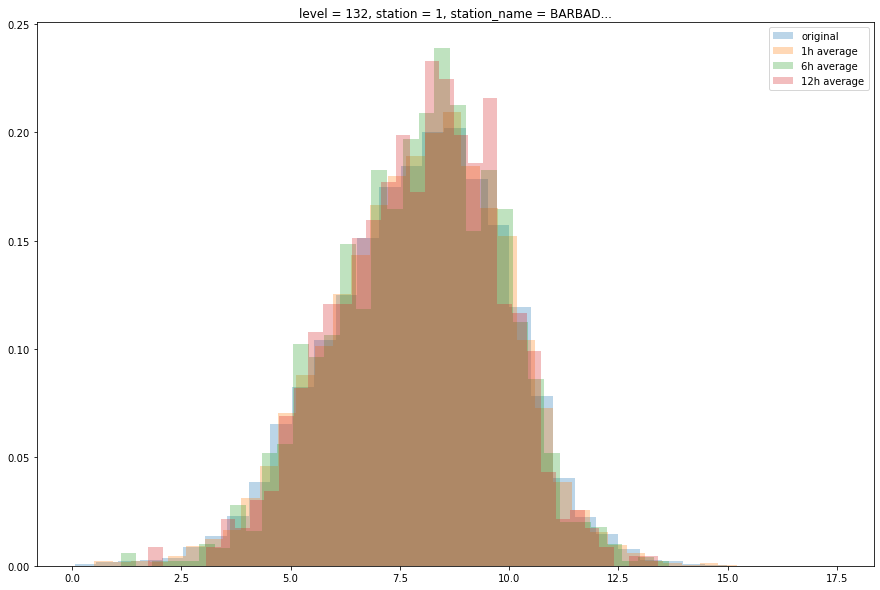

In [19]:
wind_speed_example.plot.hist(bins=35, alpha=0.3, density=True, label='original');
wind_speed_example.resample({'time': 'h'}).mean().plot.hist(bins=35, alpha=0.3, density=True, label='1h average');
wind_speed_example.resample({'time': '6h'}).mean().plot.hist(bins=35, alpha=0.3, density=True, label='6h average');
wind_speed_example.resample({'time': '12h'}).mean().plot.hist(bins=35, alpha=0.3, density=True, label='12h average');
plt.legend();

In [21]:
wind_speed_resampled = [
    wind_speed,
    wind_speed.resample(time='1h').mean(),
    wind_speed.resample(time='12h').mean(),
    wind_speed.resample(time='24h').mean(),
    wind_speed.resample(time='1m').mean(),
]

In [22]:
power_all_resolutions = xr.concat(
    (wind2power(wind_speed).mean(dim='time') for wind_speed in wind_speed_resampled),
    dim='resolution',
)
power_all_resolutions = power_all_resolutions.assign_coords({'resolution': ['3min', '1h', '12h', '24h', '1 month']})
power_all_resolutions = power_all_resolutions.assign_coords({'station': power_all_resolutions.station_name})

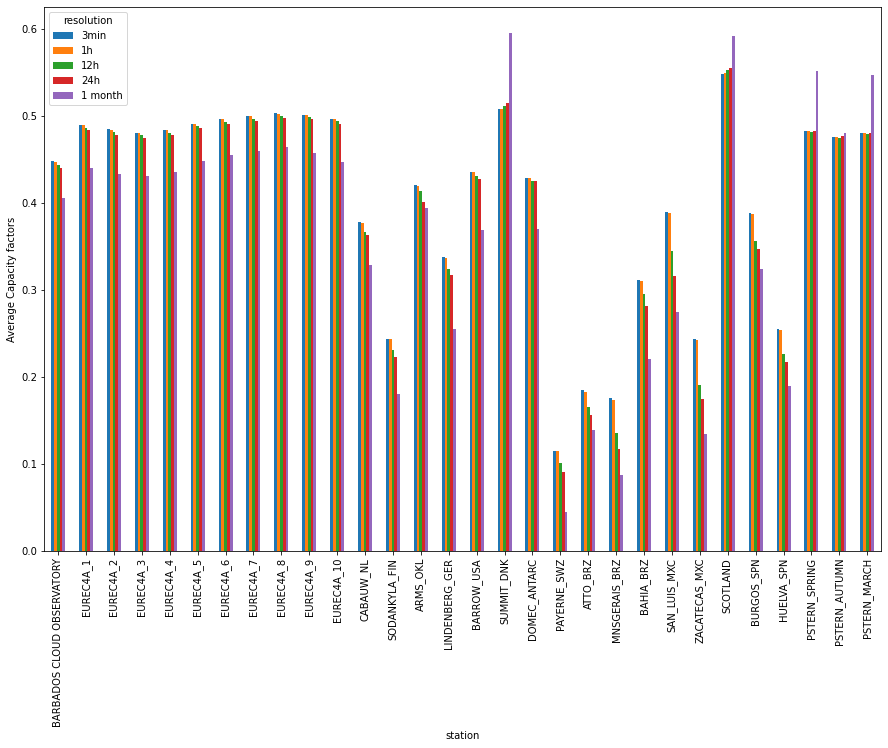

In [23]:
power_all_resolutions.to_series().unstack(0).plot(kind='bar');
plt.ylabel('Average Capacity factors');

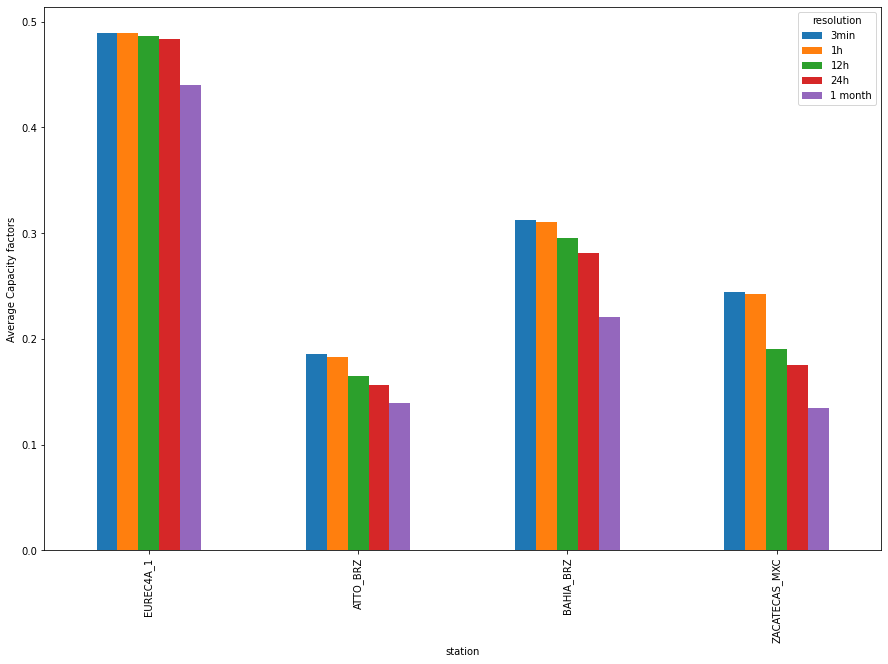

In [24]:
power_all_resolutions.sel(station=ds.station_name.isel(station=[1, 19, 21, 23])).to_series().unstack(0).plot(kind='bar');
plt.ylabel('Average Capacity factors');